In [35]:
# import des packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [36]:
# Création du dataframe
df = pd.read_csv("data\DepensesEduData.csv", sep=";", header = 0, index_col=0)

In [37]:
# première visualisation des datas du df
df.head()

,nbEleves,Depenses
Allemagne,"14065,4","106626,4"
Autriche,"1467,8","13722,8"
Belgique,"2427,7","18427,4"
Bulgarie,"1141,8",2968
Danemark,"1151,6","12909,4"


In [38]:
# description des données du df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Allemagne to PaysMagique
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   nbEleves  26 non-null     object
 1   Depenses  26 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [39]:
# On voit ici que les données sont de type objet, or on voudrait des float, on remplace la virgule par un . pour le changement de type
def format(df, col):
    for i in range(len(df[col])):
        df[col][i] = df[col][i].replace(',', '.')
    df[col] = df[col].astype(float)
    return df

In [40]:
# On voit ici que les données sont de type objet, or on voudrait des float, on remplace la virgule par un . pour le changement de type
df = format(df, 'Depenses')
df = format(df, 'nbEleves')

C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_9688/1107289529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] = df[col][i].replace(',', '.')


In [41]:
# Étude du df avec compte des données, moyenne, écrat type, min, 1Q, mediane, 3Q et max
summary = df.describe()
summary = summary.transpose()
summary.head()

,count,mean,std,min,25%,50%,75%,max
nbEleves,26.0,4846.961538,7483.535029,74.0,1054.90,1864.2,6687.35,35062.2
Depenses,26.0,25399.626923,32314.238293,492.9,3048.05,10030.8,27863.85,106626.4


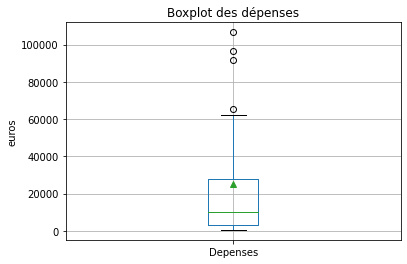

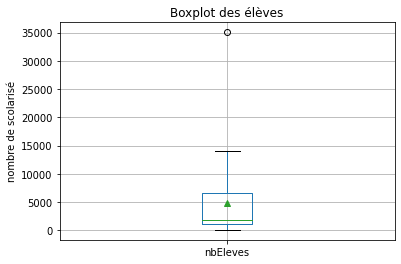

In [42]:
df.boxplot(column = 'Depenses', showmeans = True)
plt.ylabel('euros')
plt.title('Boxplot des dépenses')
plt.show()
df.boxplot(column = 'nbEleves', showmeans = True)
plt.ylabel('nombre de scolarisé')
plt.title('Boxplot des élèves')
plt.show()

On remarque quelques valeurs qui semblent abérrantes

Text(0.5, 1.0, 'nuage de points des dépenses en fonction du nombre d élèves')

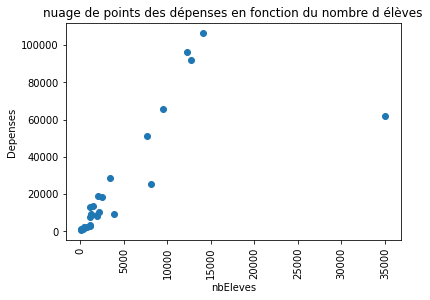

In [43]:
# Construction d'un graph en nuage de points en fonction du nbr d'éleves et des dépenses par pays. 
plt.scatter(df['nbEleves'], df['Depenses'])
plt.ylabel('Depenses')
plt.xlabel('nbEleves')
plt.xticks(rotation = 90)
plt.title('nuage de points des dépenses en fonction du nombre d élèves')

Ici la variables tout à droite semble faussé. Nous allons tout de même étudier la matrice de covariance et l'indicateur de correlation avec

In [44]:
# étude de la matrice de covariance
print("matrice de covariance : \n")
np.cov(df['Depenses'], df['nbEleves'])

matrice de covariance : 



array([[1.04421000e+09, 1.75006654e+08],
       [1.75006654e+08, 5.60032965e+07]])

In [45]:
# Coefficient de correlation linéaire entre les dépenses d'un pays et son nombre d'élèves
coeff_pearson,_ = pearsonr(df['Depenses'], df['nbEleves'])
print("coefficient de Pearson = {}".format(coeff_pearson))

coefficient de Pearson = 0.7236921197262562


On se rend compte que l'indice de correlation n'est pas aussi haut qu'attendu, on réhitère les calcules sans la valeurs la plus aberrante.

In [46]:
# Le pays imaginaire semble être une valeur aberrante, on réeffectue les observations en le retirant
df_propre = df.copy()
df_propre = df_propre[df_propre['nbEleves']<30000]

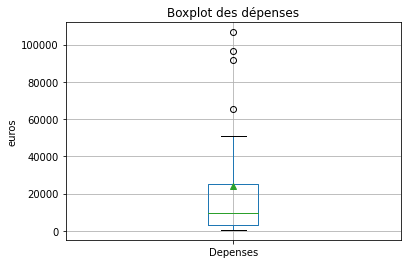

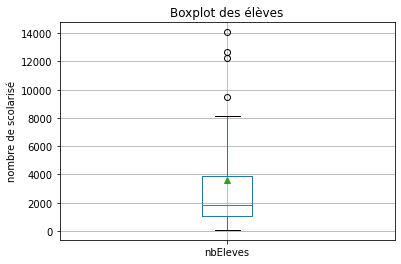

In [47]:
df_propre.boxplot(column = 'Depenses', showmeans = True)
plt.ylabel('euros')
plt.title('Boxplot des dépenses')
plt.show()
df_propre.boxplot(column = 'nbEleves', showmeans = True)
plt.ylabel('nombre de scolarisé')
plt.title('Boxplot des élèves')
plt.show()

In [48]:
# on recalcule le coefficient de correlatione et la matrice de covariance sans la valeurs aberrantes
print("Matrice de covariance : \n\n", np.cov(df_propre['Depenses'], df_propre['nbEleves']), "\n")
coeff_pearson,_ = pearsonr(df_propre['Depenses'], df_propre['nbEleves'])
print("coefficient de Pearson = {}".format(coeff_pearson))

Matrice de covariance : 

 [[1.02950871e+09 1.34310228e+08]
 [1.34310228e+08 1.87751397e+07]] 

coefficient de Pearson = 0.966056406103996


Il est confirmé que le pays imaginaire fait grandement baisser la correlation entre les deux variables.

In [49]:
df_propre

,nbEleves,Depenses
Allemagne,14065.4,106626.4
Autriche,1467.8,13722.8
Belgique,2427.7,18427.4
Bulgarie,1141.8,2968.0
Danemark,1151.6,12909.4
Espagne,7615.3,51025.8
Estonie,257.5,1116.1
Finlande,1251.3,9177.7
France,12264.6,96315.8
Hongrie,1873.0,8160.8


In [50]:
# On effectue une régression lineaire sur les données. 
RegLineaire = LinearRegression().fit(df_propre[['nbEleves']], df_propre['Depenses']) #['nbEleves'], df_propre['Depenses'])
# Afficher le coefficient et l'intercept
print("Coefficient:", RegLineaire.coef_[0])
print("Intercept:", RegLineaire.intercept_)

Coefficient: 7.1536207028714145
Intercept: -2093.8101915336156


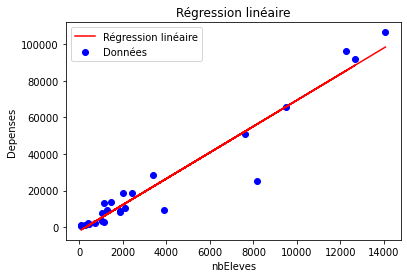

In [51]:
# réalise un graphique pour les résultats de la régression linéaire. 
df_propre['y_pred'] = RegLineaire.predict(df_propre[['nbEleves']])

plt.scatter(df_propre['nbEleves'], df_propre['Depenses'], color='blue', label='Données')
plt.plot(df_propre['nbEleves'], df_propre['y_pred'], color='red', label='Régression linéaire')
plt.title('Régression linéaire')
plt.xlabel('nbEleves')
plt.ylabel('Depenses')
plt.legend()
plt.show()

On réalise qu'il y as deux pays qui sortent des prédictions : La Roumanie et la Pologne

In [55]:
# seconde méthode de régression linéaire ; scipy stats
lr = linregress(df_propre['nbEleves'], df_propre['Depenses'])
lr

LinregressResult(slope=7.153620702871415, intercept=-2093.810191533619, rvalue=0.966056406103996, pvalue=5.13084626980696e-15, stderr=0.39887462128097034, intercept_stderr=2230.1956987465246)

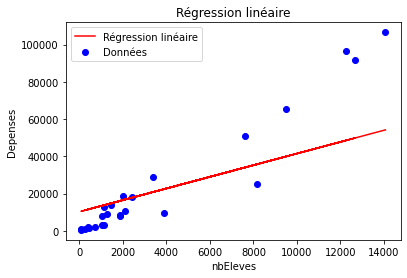

In [59]:
slope, intercept, r_value, p_value, std_err = linregress(df['nbEleves'], df['Depenses'])

# Prédiction
df_propre['y_pred'] = slope * df_propre['nbEleves'] + intercept

# Graphique
plt.scatter(df_propre['nbEleves'], df_propre['Depenses'], color='blue', label='Données')
plt.plot(df_propre['nbEleves'], df_propre['y_pred'], color='red', label='Régression linéaire')
plt.title('Régression linéaire')
plt.xlabel('nbEleves')
plt.ylabel('Depenses')
plt.legend()
plt.show()

